HELLO WORLD

In [30]:
%%capture
%pip install scipy matplotlib


In [32]:
from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

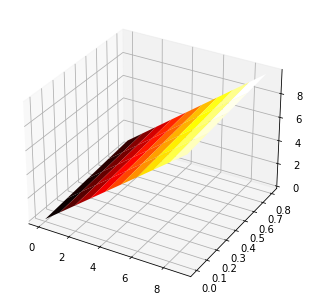

In [22]:
x = np.arange(0,10,1)
y = np.arange(0,1,0.2)

xs, ys = np.meshgrid(x, y)
# z = calculate_R(xs, ys)
zs = xs + ys

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='hot')
plt.show()

In [33]:

sample_rate, data = wavfile.read('sounds/BreakingGlass.wav')

data

array([134, 134, 134, ..., 134, 128, 128], dtype=uint8)

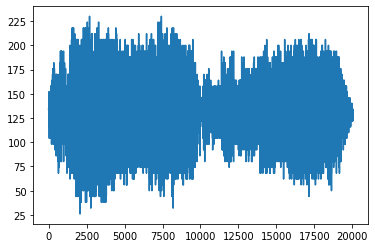

In [34]:
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
plt.plot(data)